In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'] ,index_col='date')

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
#se filtran afuera los primeros y los ultimos

In [81]:
int(df.count(numeric_only=True)) 

TypeError: cannot convert the series to <class 'int'>

In [ ]:
def draw_line_plot():
    # Draw line plot
    fig,ax = plt.subplots()    
    plt.plot(df.index,df['value'],color='firebrick',linewidth=1)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',)
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


In [ ]:
draw_line_plot()

In [ ]:
fig,ax = plt.subplots()
plt.plot(df.index,df['value'],color='firebrick',linewidth=1)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',)
plt.xlabel('Date')
plt.ylabel('Page Views')


In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['month'] = df.index.month
    df['year'] = df.index.year
    #agregamos las columnas mes y anio. 
    
    df_bar = df.groupby(["year","month"])['value'].mean() #agrupamos
    df_bar = df_bar.unstack()
    # Draw bar plot
    fig = df_bar.plot.bar(legend=True,figsize=(13,6), ylabel="Average Page Views", xlabel="Years").figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


In [ ]:
draw_bar_plot()

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

In [ ]:
df_bar = df.groupby(["year","month"])['value'].mean()

In [ ]:
df_bar = df_bar.unstack()

In [ ]:
fig = df_bar.plot.bar(legend=True,figsize=(13,6), ylabel="Average Page Views", xlabel="Years").figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


In [75]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig = plt.figure(figsize=[15,5]) #creamos la figura
    plt.subplot(1,2,1) # primer cuadro
    
    ax = sns.boxplot(data=df_box,y='value',x='year')
    ax.set(title='Year-wise Box Plot (Trend)')
    ax.set(xlabel='Years')
    ax.set(ylabel='Page Views')

    plt.subplot(1,2,2) #segundo cuadro

    ax = sns.boxplot(data=df_box, y='value', x='month',order=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    #le ponemos el parametro order porque no aparece ordenado correctamente los meses. 
    ax.set(title='Month-wise Box Plot (Seasonality)')
    ax.set(ylabel='Page Views')
    ax.set(xlabel='Month')
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


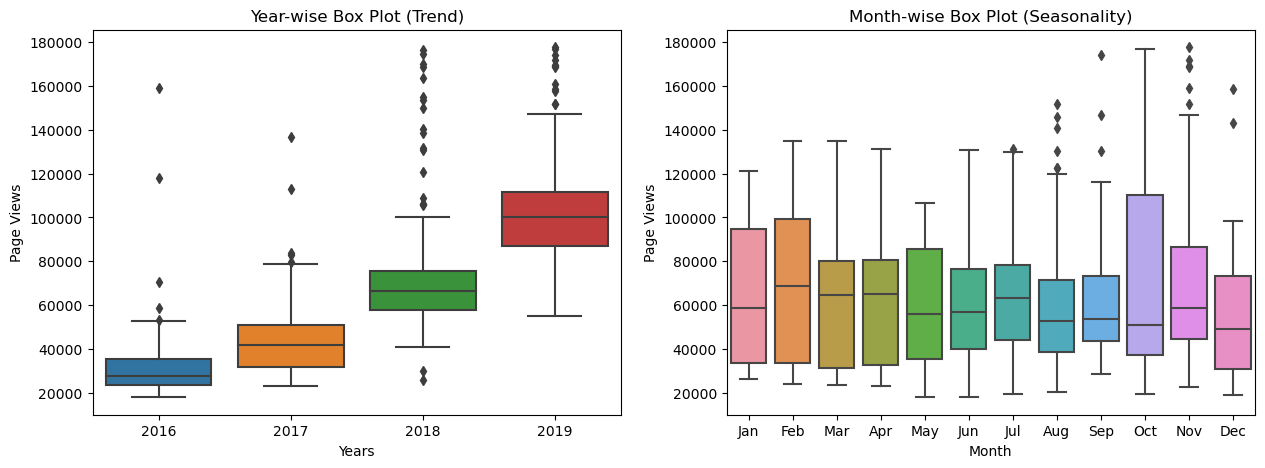

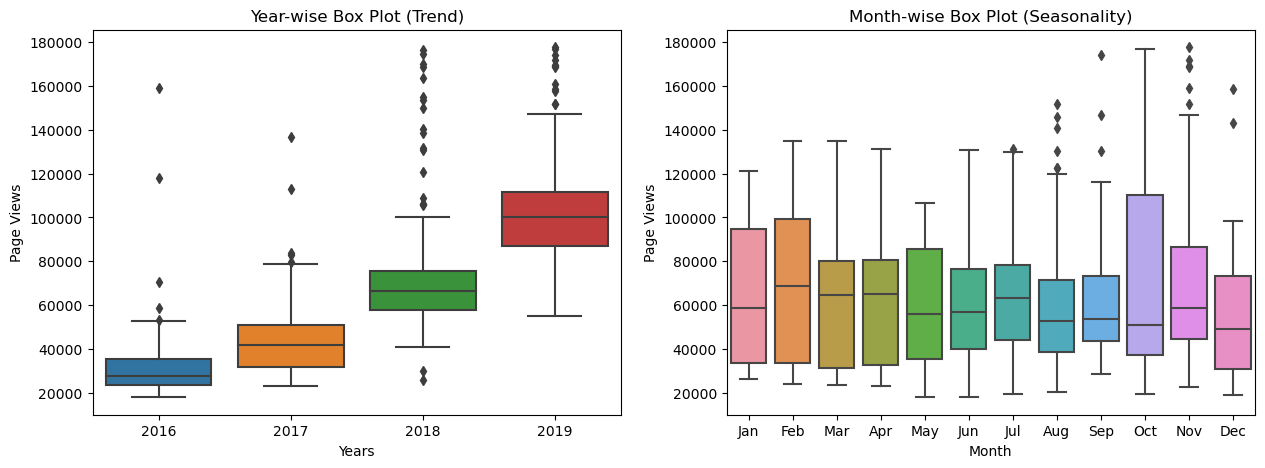

In [76]:
draw_box_plot()

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
df_box

In [ ]:
fig = plt.figure(figsize=[15,5])

In [ ]:
plt.subplot(1,2,1)

In [ ]:
ax = sns.boxplot(data=df_box,y='value',x='year')
ax.set(title='Year-wise Box Plot (Trend)')
ax.set(xlabel='Years')
ax.set(ylabel='Page Views')

In [ ]:
plt.subplot(1,2,2)

In [ ]:
ax = sns.boxplot(data=df_box, y='value', x='month',order=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set(title='Month-wise Box Plot (Seasonality)')
ax.set(ylabel='Page Views')
ax.set(xlabel='Month')